# **Sistem Pakar Diagnosis Penyakit Berbasis Ontologi dan Algoritma Random Forest**

In [ ]:
import pandas as pd

# File paths from uploaded datasets
file_path_dataset = '/content/Blood_samples_dataset_balanced_2(f).csv'

# Load both datasets
dataset = pd.read_csv(file_path_dataset)

# Display the first few rows for initial exploration of datasets
dataset_info = dataset.head(), dataset.info(), dataset.describe()

# Print the exploration results
print("Dataset Exploration:")
print(dataset_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    2351 non-null   float64
 1   Cholesterol                                2351 non-null   float64
 2   Hemoglobin                                 2351 non-null   float64
 3   Platelets                                  2351 non-null   float64
 4   White Blood Cells                          2351 non-null   float64
 5   Red Blood Cells                            2351 non-null   float64
 6   Hematocrit                                 2351 non-null   float64
 7   Mean Corpuscular Volume                    2351 non-null   float64
 8   Mean Corpuscular Hemoglobin                2351 non-null   float64
 9   Mean Corpuscular Hemoglobin Concentration  2351 non-null   float64
 10  Insulin                 

In [ ]:
# Menampilkan daftar kolom untuk memastikan nama kolom yang benar
dataset.columns.tolist()

['Glucose',
 'Cholesterol',
 'Hemoglobin',
 'Platelets',
 'White Blood Cells',
 'Red Blood Cells',
 'Hematocrit',
 'Mean Corpuscular Volume',
 'Mean Corpuscular Hemoglobin',
 'Mean Corpuscular Hemoglobin Concentration',
 'Insulin',
 'BMI',
 'Systolic Blood Pressure',
 'Diastolic Blood Pressure',
 'Triglycerides',
 'HbA1c',
 'LDL Cholesterol',
 'HDL Cholesterol',
 'ALT',
 'AST',
 'Heart Rate',
 'Creatinine',
 'Troponin',
 'C-reactive Protein',
 'Disease']

In [ ]:
# Memeriksa data kosong untuk dataset
print("Missing values in Dataset:")
print(dataset.isnull().sum())

Missing values in Dataset:
Glucose                                      0
Cholesterol                                  0
Hemoglobin                                   0
Platelets                                    0
White Blood Cells                            0
Red Blood Cells                              0
Hematocrit                                   0
Mean Corpuscular Volume                      0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Hemoglobin Concentration    0
Insulin                                      0
BMI                                          0
Systolic Blood Pressure                      0
Diastolic Blood Pressure                     0
Triglycerides                                0
HbA1c                                        0
LDL Cholesterol                              0
HDL Cholesterol                              0
ALT                                          0
AST                                          0
Heart Rate                       

**1. Preprocesing**

Dataset sudah bersih, yaitu tidak ada mising values dan data sudah diskalakan dalam rentang 0-1

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming 'dataset' is a DataFrame
df = dataset  # Jika dataset hanya satu DataFrame, langsung gunakan dataset.

# Split the data into features (X) and target (y)
X = df.drop('Disease', axis=1)  # Fitur
y = df['Disease']  # Target

# Preprocess the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Standarisasi fitur

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Menampilkan bentuk data setelah preprocessing
print(f"Data Latih X_train shape: {X_train.shape}")
print(f"Data Uji X_test shape: {X_test.shape}")


Data Latih X_train shape: (1880, 24)
Data Uji X_test shape: (471, 24)


**2. Membangun Ontology**

Ontology akan digunakan untuk mendefinisikan konsep dan relasi antar fitur (seperti Glucose, Cholesterol, Hemoglobin, dll.) dan penyakit yang terdeteksi. Ontology ini bisa digambarkan dalam format RDF atau OWL.

Ontology dapat mendefinisikan penyakit, gejala, dan tes-tes darah yang relevan dengan rentang nilai parameter yang sudah ada dalam dataset. Ontology ini bisa disimpan dalam file OWL atau RDF.

Disini kami menggunakan RDFlib (library Python untuk mengelola data RDF) dan OWL untuk mendeskripsikan parameter medis.

In [ ]:
pip install owlready2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.3/27.3 MB 30.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for owlready2: filename=owlready2-0.47-cp310-cp310-linux_x86_64.whl size=24075197 sha256=3d88379e6c9452ca17233c712fdd281ef1467276cf8bff75bfb9958c0fceb7e2
  Stored in directory: /root/.cache/pip/wheels/27/3e/ba/4171c4b10bba9fe1774fbf8fcf794de889e636ce64ad83a533
Successfully built owlready2


In [ ]:
import pandas as pd

# Membaca dataset
df = pd.read_csv('/content/Blood_samples_dataset_balanced_2(f).csv')

# Periksa nama kolom untuk memastikan konsistensi
print(df.columns)

# Define ontology structure
ontology = {
    "classes": {
        "Disease": {
            "attributes": ["name"],  # Atribut umum untuk penyakit
            "subclasses": {}
        },
        "BloodSample": {
            "attributes": [
                "Glucose", "Cholesterol", "Hemoglobin", "Platelets", "White Blood Cells",
                "Red Blood Cells", "Hematocrit", "Mean Corpuscular Volume",
                "Mean Corpuscular Hemoglobin", "Mean Corpuscular Hemoglobin Concentration",
                "Insulin", "BMI", "Systolic Blood Pressure", "Diastolic Blood Pressure",
                "Triglycerides", "HbA1c", "LDL Cholesterol", "HDL Cholesterol",
                "ALT", "AST", "Heart Rate", "Creatinine", "Troponin", "C-reactive Protein", "Disease"
            ],  # Atribut terkait darah
            "relationships": [
                {"name": "has_disease", "target_class": "Disease"}  # Relasi dengan Disease
            ]
        },
        "Patient": {
            "attributes": ["BloodSample"],  # Atribut pasien, kita tidak punya Age atau Gender
            "relationships": [
                {"name": "has_blood_sample", "target_class": "BloodSample"}  # Relasi dengan BloodSample
            ]
        }
    }
}

# Fungsi untuk mengisi ontology dengan data dari dataset
def populate_ontology(df, ontology):
    for index, row in df.iterrows():
        # Extract disease information
        disease_name = row['Disease']  # Kolom 'Disease' ada di dataset

        # Cek apakah subclass untuk penyakit sudah ada, jika belum buat
        if disease_name not in ontology['classes']['Disease']['subclasses']:
            ontology['classes']['Disease']['subclasses'][disease_name] = {"attributes": ["name"]}

        # Create an instance for BloodSample
        blood_sample = {
            "Glucose": row["Glucose"],
            "Cholesterol": row["Cholesterol"],
            "Hemoglobin": row["Hemoglobin"],
            "Platelets": row["Platelets"],
            "White Blood Cells": row["White Blood Cells"],
            "Red Blood Cells": row["Red Blood Cells"],
            "Hematocrit": row["Hematocrit"],
            "Mean Corpuscular Volume": row["Mean Corpuscular Volume"],
            "Mean Corpuscular Hemoglobin": row["Mean Corpuscular Hemoglobin"],
            "Mean Corpuscular Hemoglobin Concentration": row["Mean Corpuscular Hemoglobin Concentration"],
            "Insulin": row["Insulin"],
            "BMI": row["BMI"],
            "Systolic Blood Pressure": row["Systolic Blood Pressure"],
            "Diastolic Blood Pressure": row["Diastolic Blood Pressure"],
            "Triglycerides": row["Triglycerides"],
            "HbA1c": row["HbA1c"],
            "LDL Cholesterol": row["LDL Cholesterol"],
            "HDL Cholesterol": row["HDL Cholesterol"],
            "ALT": row["ALT"],
            "AST": row["AST"],
            "Heart Rate": row["Heart Rate"],
            "Creatinine": row["Creatinine"],
            "Troponin": row["Troponin"],
            "C-reactive Protein": row["C-reactive Protein"],
            "Disease": disease_name  # Relasi dengan penyakit
        }

        # Add BloodSample to ontology (simulasi penambahan)
        if 'blood_samples' not in ontology:
            ontology['blood_samples'] = []
        ontology['blood_samples'].append(blood_sample)

        # Tambahkan informasi pasien berdasarkan atribut yang ada dalam dataset
        patient_id = f"Patient_{index}"  # Asumsi menggunakan index sebagai ID pasien
        patient_data = {
            "blood_samples": [blood_sample]  # Relasi dengan BloodSample
        }

        # Tambahkan pasien ke dalam ontology
        if 'patients' not in ontology:
            ontology['patients'] = {}
        ontology['patients'][patient_id] = patient_data

    return ontology

# Populate the ontology with the dataset
populated_ontology = populate_ontology(df, ontology)

# Cetak hasil ontology yang sudah terisi
import pprint
pprint.pprint(populated_ontology)

Streaming output truncated to the last 5000 lines.
              'Patient_819': {'blood_samples': [{'ALT': 0.3630500920855637,
                                                 'AST': 0.5581911188618718,
                                                 'BMI': 0.3582249760686289,
                                                 'C-reactive Protein': 0.754189320482776,
                                                 'Cholesterol': 0.0896001919198326,
                                                 'Creatinine': 0.3065393369265454,
                                                 'Diastolic Blood Pressure': 0.1115894438385649,
                                                 'Disease': 'Thalasse',
                                                 'Glucose': 0.1437715319306454,
                                                 'HDL Cholesterol': 0.2003226652346583,
                                                 'HbA1c': 0.1330014844800029,
                                                 

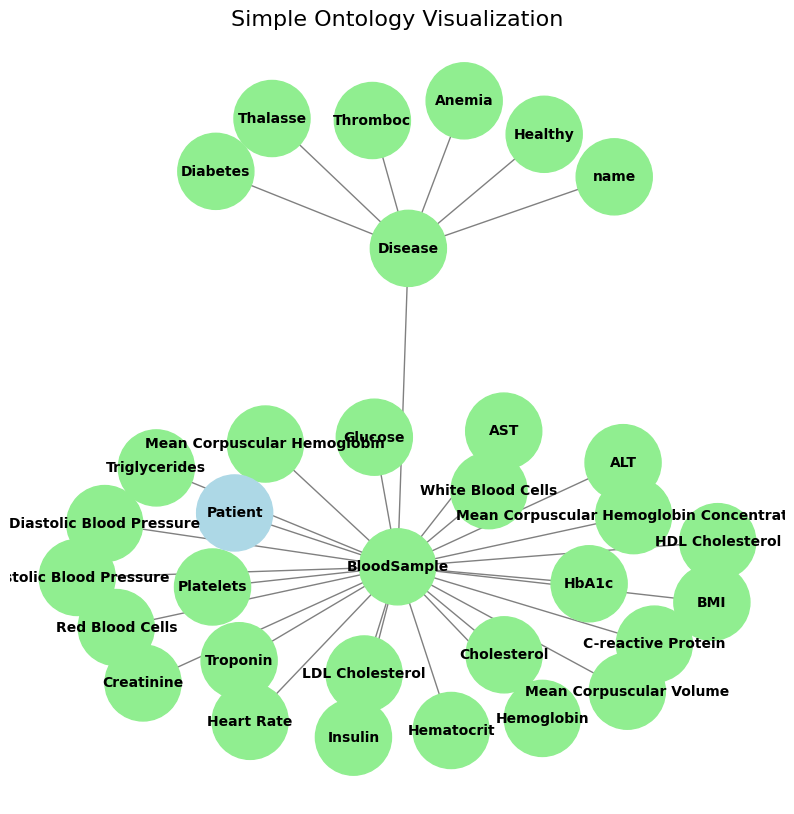

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Fungsi untuk membuat visualisasi ontology yang lebih singkat
def visualize_simple_ontology(ontology):
    G = nx.Graph()  # Membuat graph kosong

    # Menambahkan node untuk setiap kelas
    for class_name, class_data in ontology['classes'].items():
        G.add_node(class_name, type='class')

        # Menambahkan subclass untuk Disease
        if 'subclasses' in class_data:
            for subclass in class_data['subclasses']:
                G.add_node(subclass, type='subclass')
                G.add_edge(class_name, subclass)

        # Menambahkan atribut kelas
        for attribute in class_data.get('attributes', []):
            G.add_node(attribute, type='attribute')
            G.add_edge(class_name, attribute)

        # Menambahkan relasi antar kelas
        for relationship in class_data.get('relationships', []):
            target_class = relationship['target_class']
            G.add_edge(class_name, target_class, type='relationship')

    # Visualisasi graph
    pos = nx.spring_layout(G, seed=42)  # Layout graph
    plt.figure(figsize=(10, 10))

    # Menyusun node berdasarkan jenisnya (kelas vs atribut/subclass)
    node_colors = ['lightblue' if G.nodes[node].get('type') == 'class' else 'lightgreen' for node in G]
    nx.draw_networkx(G, pos, with_labels=True, node_size=3000, node_color=node_colors, font_size=10, font_weight='bold', edge_color='gray')

    plt.title("Simple Ontology Visualization", fontsize=16)
    plt.axis('off')  # Matikan sumbu
    plt.show()

# Visualisasi ontology yang lebih singkat
visualize_simple_ontology(populated_ontology)

Gambar di atas menunjukkan visualisasi ontologi sederhana untuk representasi pengetahuan medis, khususnya terkait penyakit dan data medis pasien. Berikut penjelasan elemen-elemen penting pada ontologi tersebut:

**1. Node Pusat (Disease dan BloodSample):**

Disease: Merepresentasikan berbagai jenis penyakit atau kondisi medis seperti Thalassemia, Thrombocytopenia, Anemia, Diabetes, serta status Healthy. Node ini terhubung ke nama penyakit yang bersifat spesifik.
BloodSample: Merepresentasikan data sampel darah pasien, dengan atribut-atribut seperti kadar Hemoglobin, Glucose, Platelets, dan berbagai indikator lainnya yang digunakan untuk analisis medis.

**2. Node Atribut (Hijau):**

Berbagai atribut seperti kadar gula darah (Glucose), kolesterol (HDL Cholesterol, LDL Cholesterol), enzim hati (AST, ALT), dan parameter darah lainnya (contohnya Red Blood Cells, Mean Corpuscular Volume, Hemoglobin) terhubung langsung ke BloodSample. Ini menunjukkan bahwa parameter-parameter ini diperoleh dari analisis sampel darah pasien.

**3. Node Pasien (Patient):**

Node ini terhubung ke BloodSample dan beberapa atribut lainnya seperti tekanan darah (Systolic/Diastolic Blood Pressure), detak jantung (Heart Rate), dan parameter medis lainnya yang tidak langsung berasal dari analisis darah.

**4. Relasi:**

Relasi di antara node menunjukkan hubungan hierarkis dan logis, seperti:
Penyakit (Disease) sebagai kategori utama yang mengelompokkan berbagai jenis kondisi kesehatan.
Sampel darah (BloodSample) yang menghubungkan parameter medis individu ke pasien.

**2. Pelatihan dan Evaluasi Model Random Forest**

Cross-Validation Accuracy: 0.96 ± 0.02
Akurasi pada Data Uji: 0.96

Laporan Evaluasi:
              precision    recall  f1-score   support

      Anemia       1.00      1.00      1.00       156
    Diabetes       1.00      0.86      0.92       135
     Healthy       0.93      0.96      0.94       139
    Thalasse       0.89      1.00      0.94       127
    Thromboc       1.00      1.00      1.00        31

    accuracy                           0.96       588
   macro avg       0.96      0.96      0.96       588
weighted avg       0.96      0.96      0.96       588



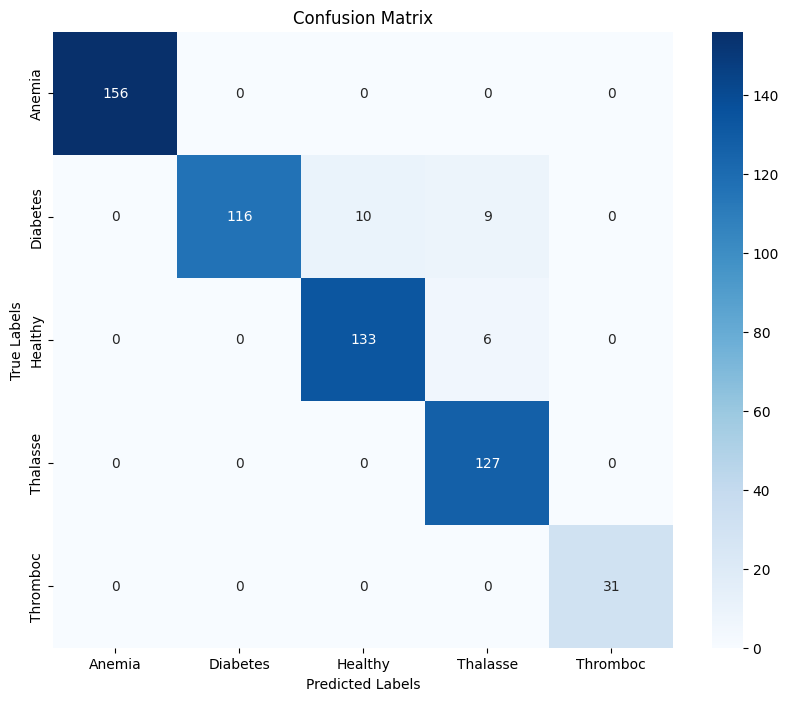


Feature Importance (Principal Components):
  Feature  Importance
0     PC1    0.229268
3     PC4    0.207692
4     PC5    0.180603
2     PC3    0.130961
5     PC6    0.114499
1     PC2    0.071970
6     PC7    0.065007


In [ ]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Membaca dataset
df = pd.read_csv('/content/Blood_samples_dataset_balanced_2(f).csv')

# Atribut berdasarkan ontology (dipilih ulang setelah analisis korelasi)
ontology_attributes = [
    "Glucose", "Cholesterol", "Hemoglobin", "Platelets", "White Blood Cells",
    "Hematocrit", "BMI", "C-reactive Protein"
]

# Menyiapkan fitur dan label
X = df[ontology_attributes]
y = df["Disease"]

# Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Mengurangi dimensi data dengan PCA
pca = PCA(n_components=0.95)  # Menjaga 95% variansi
X_pca = pca.fit_transform(X_scaled)

# Memisahkan data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.25, random_state=42, stratify=y
)

# Model Random Forest dengan pengendalian kompleksitas
rf_model = RandomForestClassifier(
    random_state=42,
    n_estimators=50,           # Kurangi jumlah estimator
    max_depth=5,               # Batasi kedalaman pohon
    min_samples_split=10,      # Minimum sampel untuk split
    min_samples_leaf=5,        # Minimum sampel di leaf
    max_samples=0.8,           # Sampling subset data (regularisasi tambahan)
    class_weight='balanced'    # Tangani ketidakseimbangan
)

# Validasi silang untuk evaluasi
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=skf, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")

# Latih model pada data latih
rf_model.fit(X_train, y_train)

# Evaluasi pada data uji
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi pada Data Uji: {accuracy:.2f}")

print("\nLaporan Evaluasi:")
print(classification_report(y_test, y_pred))

# Matriks kebingungan
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Menampilkan Feature Importance (PCA membatasi interpretasi langsung)
feature_importances = pd.DataFrame({
    'Feature': [f'PC{i+1}' for i in range(pca.n_components_)],
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance (Principal Components):")
print(feature_importances)


In [ ]:
# prompt: buatkan prediksi penyakit

import numpy as np

# Fungsi untuk melakukan prediksi
def predict_disease(input_data, rf_model, pca, scaler):
    """
    Melakukan prediksi penyakit berdasarkan data input.

    Args:
        input_data (list or numpy array): Data input pasien (harus sesuai urutan atribut).
        rf_model: Model RandomForestClassifier yang sudah dilatih.
        pca: Model PCA yang sudah difit.
        scaler: Model StandardScaler yang sudah difit.

    Returns:
        str: Prediksi penyakit.
    """
    try:
        # Ubah input menjadi array numpy
        input_data_array = np.array(input_data).reshape(1, -1)

        # Penskalaan data input
        input_scaled = scaler.transform(input_data_array)

        # Reduksi dimensi menggunakan PCA
        input_pca = pca.transform(input_scaled)

        # Prediksi dengan model Random Forest
        prediction = rf_model.predict(input_pca)[0]

        return prediction

    except ValueError as e:
        return f"Error: {e}. Pastikan data input sesuai dengan atribut yang dibutuhkan dan bertipe numerik."


# Input data untuk prediksi penyakit
example_input = [
    90, 80, 15, 180, 10, # Ganti dengan nilai nyata dari atribut
    40, 25, 15 # Ganti dengan nilai nyata dari atribut
]


# Panggil fungsi prediksi
predicted_disease = predict_disease(example_input, rf_model, pca, scaler)
print(f"Prediksi Penyakit: {predicted_disease}")

Prediksi Penyakit: Diabetes


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
